In [13]:
import torch

In [2]:
words = open('pokemon_de.txt', 'r').read().splitlines()

In [3]:
words[:10]

['bisasam',
 'bisaknosp',
 'bisaflor',
 'glumanda',
 'glutexo',
 'glurak',
 'schiggy',
 'schillok',
 'turtok',
 'raupy']

In [9]:
b = {}
for w in words:
    chars = ['<s>'] + list(w) + ['<e>']
    for c1, c2 in zip(chars, chars[1:]):
        bigram = (c1, c2)
        b[bigram] = b.get(bigram, 0) + 1

In [14]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('a', '<e>'), 152),
 (('r', 'a'), 145),
 (('e', 'l'), 130),
 (('a', 'r'), 119),
 (('<s>', 's'), 115),
 (('a', 'n'), 111),
 (('s', '<e>'), 103),
 (('o', '<e>'), 101),
 (('o', 'r'), 99),
 (('o', 'n'), 96),
 (('n', '<e>'), 94),
 (('<s>', 'k'), 93),
 (('l', '<e>'), 90),
 (('<s>', 'm'), 89),
 (('l', 'a'), 89),
 (('r', 'o'), 88),
 (('m', 'a'), 80),
 (('i', 'n'), 80),
 (('<s>', 'p'), 77),
 (('e', 'r'), 73),
 (('c', 'h'), 71),
 (('l', 'i'), 71),
 (('r', 'i'), 70),
 (('t', 'a'), 68),
 (('a', 'l'), 65),
 (('i', '<e>'), 63),
 (('a', 'm'), 62),
 (('r', '<e>'), 62),
 (('t', 'o'), 62),
 (('<s>', 'f'), 62),
 (('o', 'l'), 61),
 (('l', 'o'), 59),
 (('o', 's'), 58),
 (('k', '<e>'), 57),
 (('n', 'i'), 57),
 (('t', 'e'), 56),
 (('e', 'n'), 56),
 (('l', 'l'), 55),
 (('<s>', 'g'), 54),
 (('l', 'e'), 51),
 (('i', 's'), 49),
 (('a', 's'), 49),
 (('<s>', 't'), 49),
 (('m', 'o'), 49),
 (('<s>', 'b'), 47),
 (('l', 'u'), 47),
 (('a', 't'), 47),
 (('n', 'a'), 46),
 (('<s>', 'l'), 46),
 (('k', 'a'), 45),
 (('i', 

In [64]:
N = torch.zeros((36, 36), dtype=torch.int32)

In [70]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [71]:
for w in words:
    cs = ['.'] + list(w) + ['.']
    for c1, c2 in zip(cs, cs[1:]):
        ix1 = stoi[c1]
        ix2 = stoi[c2]
        N[ix1, ix2] += 1

(-0.5, 35.5, 35.5, -0.5)

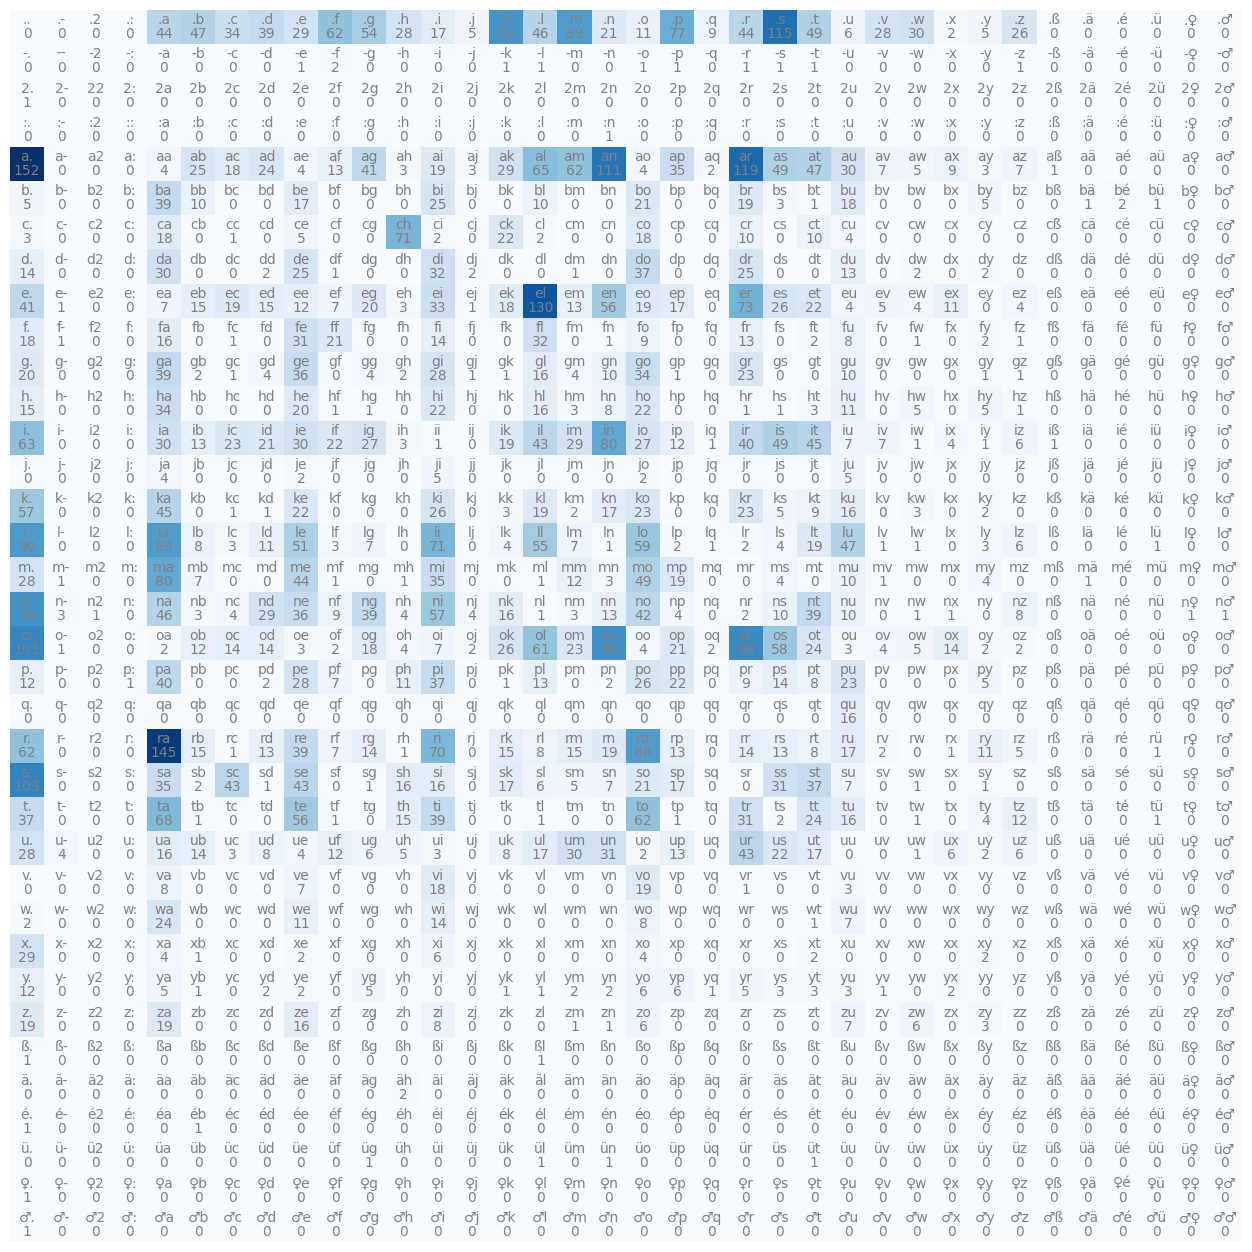

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(36):
    for j in range(36):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va= 'top', color='gray')
plt.axis('off')

In [80]:
N[0]

tensor([  0,   0,   0,   0,  44,  47,  34,  39,  29,  62,  54,  28,  17,   5,
         93,  46,  89,  21,  11,  77,   9,  44, 115,  49,   6,  28,  30,   2,
          5,  26,   0,   0,   0,   0,   0,   0], dtype=torch.int32)

In [103]:
p = N[0].float()
p /= p.sum()
p

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0436, 0.0465, 0.0337, 0.0386, 0.0287,
        0.0614, 0.0535, 0.0277, 0.0168, 0.0050, 0.0921, 0.0455, 0.0881, 0.0208,
        0.0109, 0.0762, 0.0089, 0.0436, 0.1139, 0.0485, 0.0059, 0.0277, 0.0297,
        0.0020, 0.0050, 0.0257, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])

In [243]:
g=torch.Generator().manual_seed(42)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'n'

In [246]:
P = N.float()
P /= P.sum(1, keepdim=True)

In [252]:
g = torch.Generator().manual_seed(42)


for i in range(10):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

vollaleis.
zen.
aiudunega.
dakan.
qurana.
feta.
bos.
aimmagizene.
hagon.
nan.
